In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
tree = ET.parse("books_large.xml")
tree

In [3]:
root = tree.getroot()
root

<Element 'Catalog' at 0x000002DD3B8CAAC0>

In [4]:
for libro in root.findall('Book'):
    titulo = libro.find('Title').text
    autor = libro.find('Author').text
    genero = libro.find('Genre').text
    publicacion = libro.find('PublishDate').text
    precio = libro.find('Price').text
    descripcion = libro.find('Description').text
    
    print(f' --Processing Book-- \n      Título: {titulo} \n      Autor:{autor} \n      Género:{genero} \n      Precio: {precio}\n      Fecha Publicación:{publicacion}\n      Descripción: {descripcion}')

 --Processing Book-- 
      Título: XML Developer's Guide 
      Autor:Garghentini, Davide 
      Género:Computer 
      Precio: 44.95
      Fecha Publicación:2000-10-01
      Descripción: An in-depth look at creating applications
      with XML.
 --Processing Book-- 
      Título: Midnight Rain 
      Autor:Garcia, Debra 
      Género:Fantasy 
      Precio: 5.95
      Fecha Publicación:2000-12-16
      Descripción: A former architect battles corporate zombies,
      an evil sorceress, and her own childhood to become queen
      of the world.
 --Processing Book-- 
      Título: The Adventures of Data 
      Autor:Smith, John 
      Género:Adventure 
      Precio: 29.99
      Fecha Publicación:2002-05-15
      Descripción: A thrilling journey through the world of data.
 --Processing Book-- 
      Título: Code Chronicles 
      Autor:Johnson, Emily 
      Género:Science Fiction 
      Precio: 12.50
      Fecha Publicación:2001-08-20
      Descripción: An epic tale of coding and discovery

In [5]:
books = pd.read_xml('books_large.xml')

In [6]:
books

,id,Author,Title,Genre,Price,PublishDate,Description
0,bk101,"Garghentini, Davide",XML Developer's Guide,Computer,44.95,2000-10-01,An in-depth look at creating applications\n ...
1,bk102,"Garcia, Debra",Midnight Rain,Fantasy,5.95,2000-12-16,"A former architect battles corporate zombies,\..."
2,bk102,"Smith, John",The Adventures of Data,Adventure,29.99,2002-05-15,A thrilling journey through the world of data.
3,bk104,"Johnson, Emily",Code Chronicles,Science Fiction,12.50,2001-08-20,An epic tale of coding and discovery.
4,bk105,"Martin, David",Data Dilemma,Mystery,19.95,2004-03-10,Solving mysteries in the data-driven world.
...,...,...,...,...,...,...,...
59,bk1002,"Chang, Brian",Data Dreamscape,Science Fiction,22.50,2007-01-08,Exploring dreams and realities through the len...
60,bk1003,"Lee, Emma",Algorithmic Artistry,Art,26.95,2000-10-18,Expressing artistic visions through the magic ...
61,bk1004,"Wu, Christopher",Code Carnival,Entertainment,31.75,2008-06-30,A carnival of coding wonders and entertainment.
62,bk1005,"Nguyen, Emily",Quantum Quilt,Crafts,24.50,2009-12-15,Creating a quilt of quantum patterns with code.


In [7]:
books.describe()

,Price
count,64.000000
mean,24.285781
std,6.094988
min,5.950000
25%,19.987500
50%,24.850000
75%,27.992500
max,44.950000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Cristian Mendieta\AppData\Local\Temp\ipykernel_7232\957682717.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


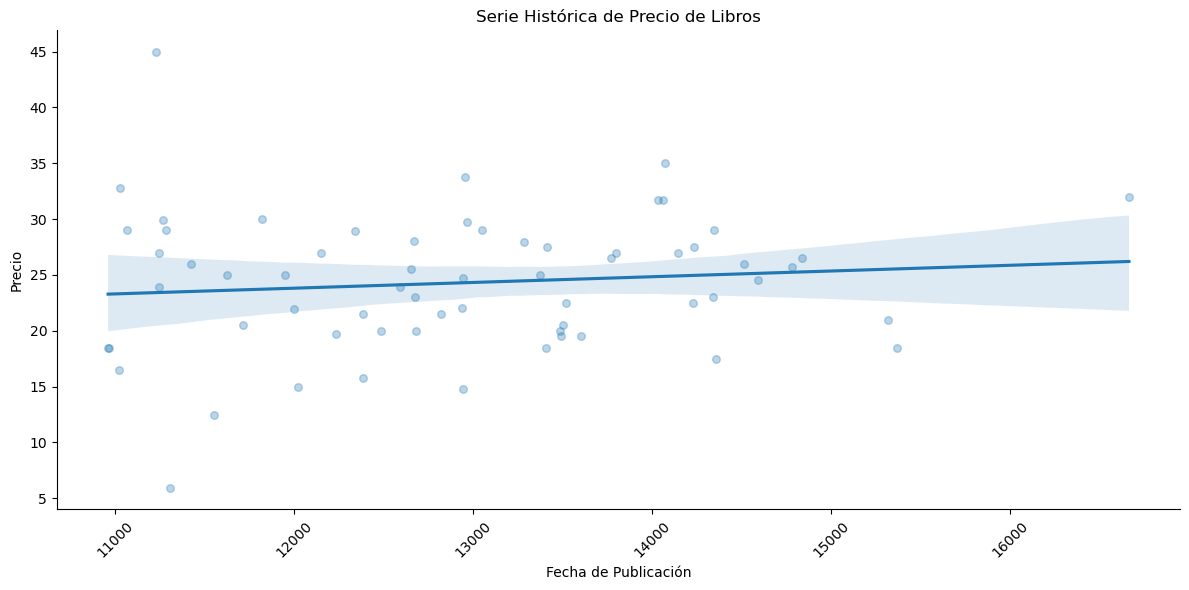

In [8]:
books['PublishDate'] = pd.to_datetime(books['PublishDate'])

books['PublishDate'] = books['PublishDate'].apply(mdates.date2num)

sns.lmplot(x='PublishDate', y='Price', data=books, height=6, aspect=2, scatter_kws={'alpha':0.3, 's':30})
plt.xlabel('Fecha de Publicación')
plt.ylabel('Precio')
plt.title('Serie Histórica de Precio de Libros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()